## Importing libraries and dataset

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv("adult.data", header=None, names = column_names)

In [36]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Analysis

In [38]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


null values

In [39]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Education and educational-num are corresponding, therefore droping education column

In [40]:
df = df.drop(columns=["education"], axis=1)

In [41]:
df = df.drop(columns=["fnlwgt"], axis=1)

In [42]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Education vs Income

Text(0, 0.5, 'Proportion of population')

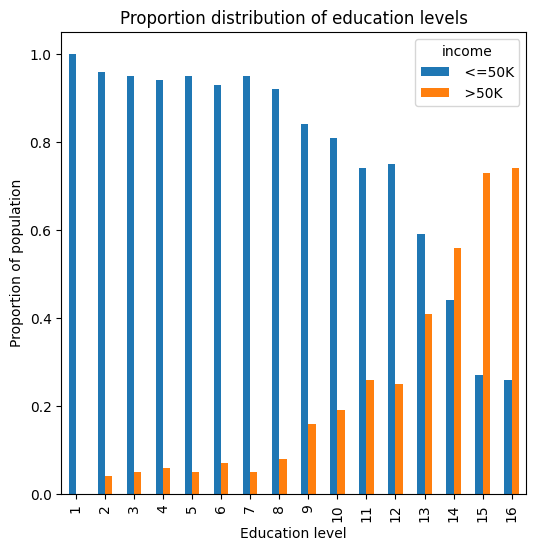

In [43]:
education = round(pd.crosstab(df['educational-num'], df.income).div(pd.crosstab(df['educational-num'], df.income).apply(sum,1),0),2)
ax = education.plot(kind ='bar', title = 'Proportion distribution of education levels', figsize = (6, 6))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

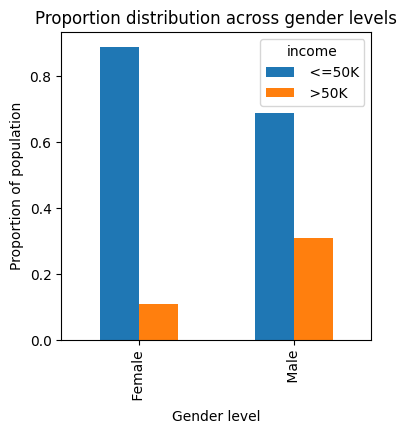

In [44]:
gender = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum, 1), 0), 2)
ax = gender.plot(kind='bar', title='Proportion distribution across gender levels', figsize=(4,4))
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

### Model preparation

In [45]:
df = df.drop(columns=["native-country" ], axis=1)

In [46]:
dataframe2 = pd.get_dummies(df, drop_first=True)

In [47]:
dataframe2.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,income_ >50K
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,50,13,0,0,13,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,38,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,53,7,0,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,13,0,0,40,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False


In [48]:
X = dataframe2.drop(columns=['income_ >50K'], axis=1)
y = dataframe2['income_ >50K']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
model = LogisticRegression()

In [52]:
model.fit(X_train, y_train)

C:\Users\Rashmin Chaudhari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred

array([False, False,  True, ...,  True, False, False])

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.82189
              precision    recall  f1-score   support

       False       0.86      0.91      0.89      7550
        True       0.63      0.51      0.57      2219

    accuracy                           0.82      9769
   macro avg       0.75      0.71      0.73      9769
weighted avg       0.81      0.82      0.82      9769



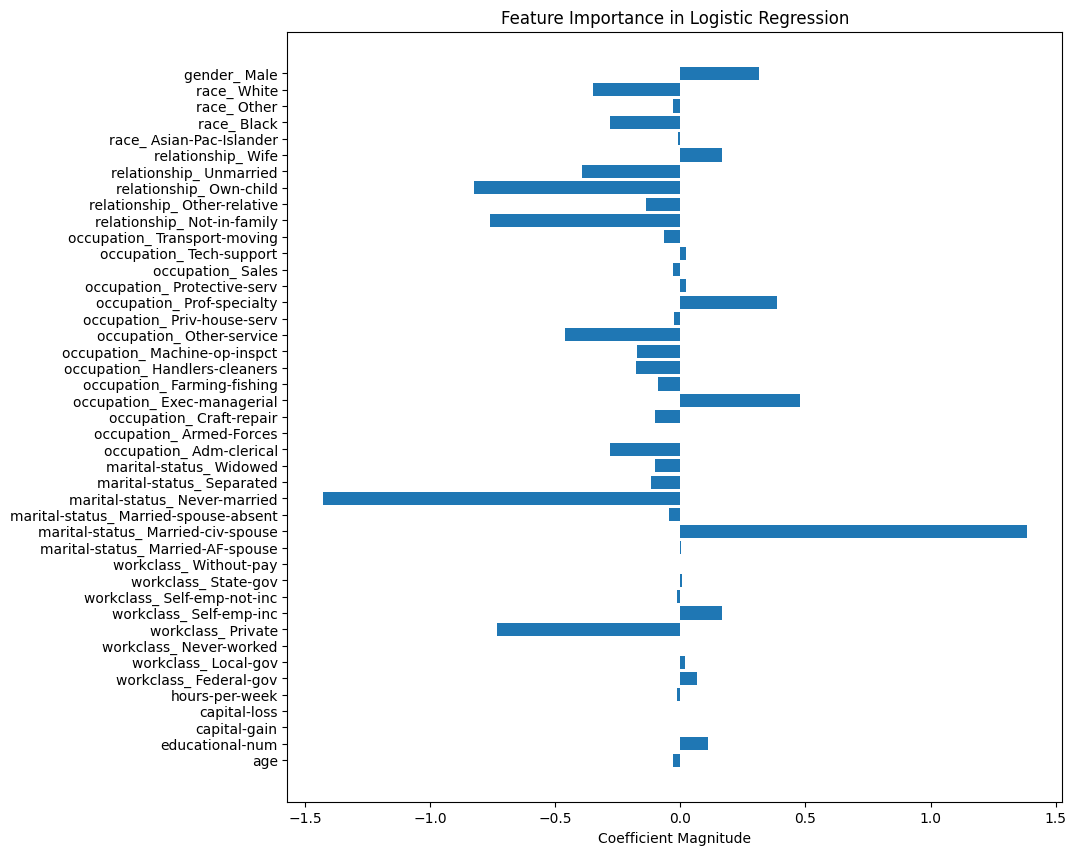

In [57]:
coef = model.coef_ [0]
features = X.columns
plt.figure(figsize=(10, 10))
plt.barh(features, coef)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()